# Decision Tree on Titanic Survival Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("titanic.csv")
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
df=df[['Survived','Pclass','Sex','Age','Fare']]
df.head()

Survived  Pclass     Sex   Age     Fare
0         0       3    male  22.0   7.2500
1         1       1  female  38.0  71.2833
2         1       3  female  26.0   7.9250
3         1       1  female  35.0  53.1000
4         0       3    male  35.0   8.0500

## Cleaning Dataset

In [4]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [5]:
df.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [6]:
df['Age']=df.groupby("Sex")['Age'].transform(lambda x:x.fillna(x.mean()))

In [7]:
df.head()

Survived  Pclass     Sex   Age     Fare
0         0       3    male  22.0   7.2500
1         1       1  female  38.0  71.2833
2         1       3  female  26.0   7.9250
3         1       1  female  35.0  53.1000
4         0       3    male  35.0   8.0500

In [8]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

## Changing Sex column to numerical
#### 0->Female     1->Male

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le=LabelEncoder()

In [11]:
df['Sex']=le.fit_transform(df.Sex)
df.head()

Survived  Pclass  Sex   Age     Fare
0         0       3    1  22.0   7.2500
1         1       1    0  38.0  71.2833
2         1       3    0  26.0   7.9250
3         1       1    0  35.0  53.1000
4         0       3    1  35.0   8.0500

In [12]:
X=df.drop(columns="Survived")

In [13]:
Y=df['Survived']

In [14]:
X

Pclass  Sex        Age     Fare
0         3    1  22.000000   7.2500
1         1    0  38.000000  71.2833
2         3    0  26.000000   7.9250
3         1    0  35.000000  53.1000
4         3    1  35.000000   8.0500
..      ...  ...        ...      ...
886       2    1  27.000000  13.0000
887       1    0  19.000000  30.0000
888       3    0  27.915709  23.4500
889       1    1  26.000000  30.0000
890       3    1  32.000000   7.7500

[891 rows x 4 columns]

In [15]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [18]:
print(X.shape,X_train.shape,X_test.shape)

(891, 4) (712, 4) (179, 4)


## Train Model

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
clf1=DecisionTreeClassifier(random_state=2,criterion='gini')
clf1.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=2)

In [21]:
clf2=DecisionTreeClassifier(random_state=2,criterion='entropy')
clf2.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=2)

## Checking accuracy on test data

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
# For Gini
Y_prediction1=clf1.predict(X_test)
accuracy_score(Y_test,Y_prediction1)

0.7597765363128491

In [24]:
# For Entropy
Y_prediction2=clf2.predict(X_test)
accuracy_score(Y_test,Y_prediction2)

0.776536312849162

## Checking Accuracy on Training Data

In [25]:
# For Gini
Y_prediction3=clf1.predict(X_train)
accuracy_score(Y_train,Y_prediction3)

0.9845505617977528

In [26]:
# For Entropy
Y_prediction4=clf2.predict(X_train)
accuracy_score(Y_train,Y_prediction4)

0.9845505617977528

### Here we can clearly see that for training dataset our accuracy is very high whereas for test dataset it is very low,hence our model is overfitted and to avoid this we will use Pruning method later.


## Visualizing Tree

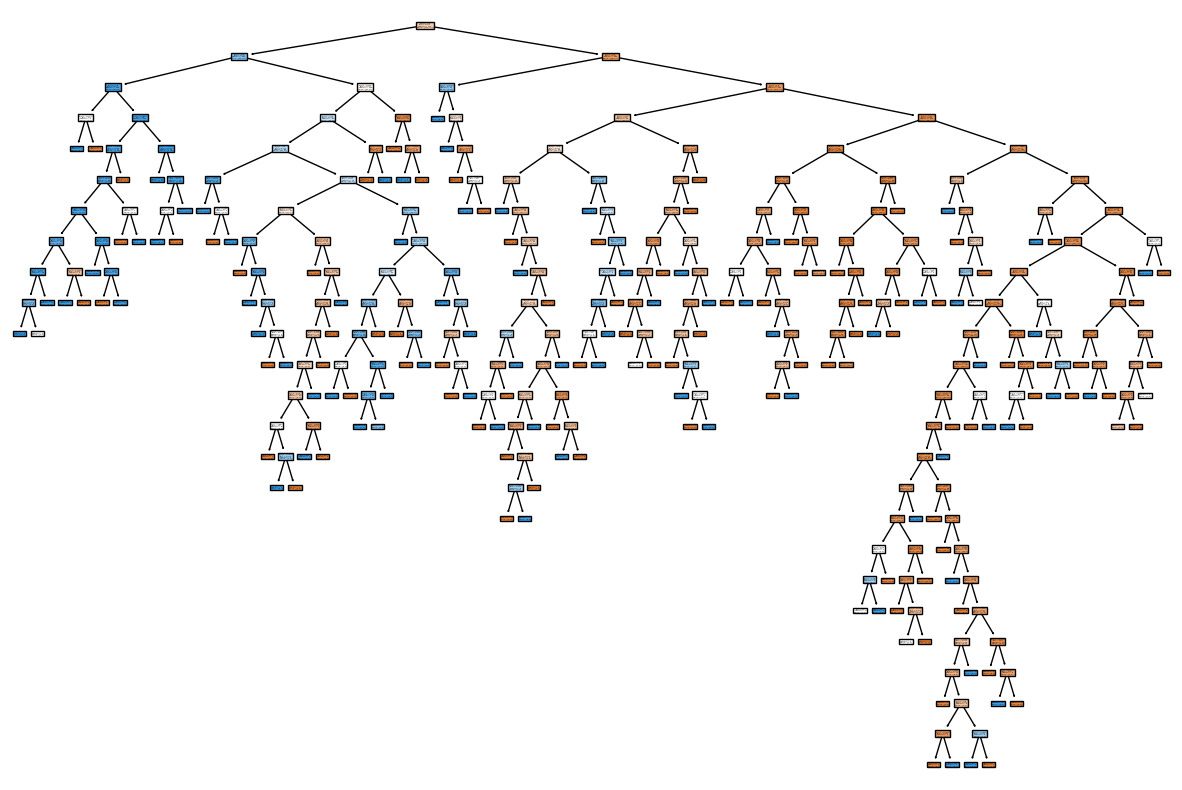

In [27]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf1,filled=True)
plt.show()

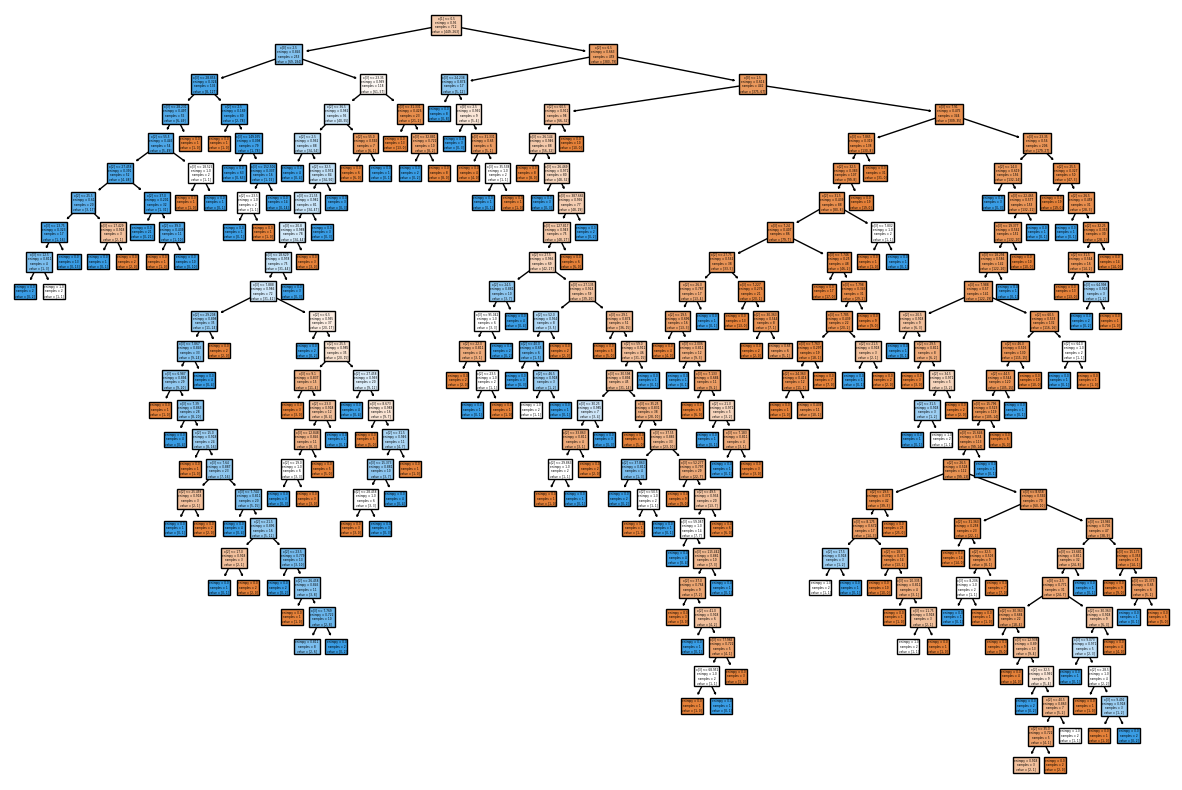

In [28]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf2,filled=True)
plt.show()

[Text(0.356742527173913, 0.98, 'x[1] <= 0.5\ngini = 0.466\nsamples = 712\nvalue = [449, 263]'),
 Text(0.19701086956521738, 0.94, 'x[0] <= 2.5\ngini = 0.397\nsamples = 253\nvalue = [69, 184]'),
 Text(0.08843873517786562, 0.9, 'x[2] <= 2.5\ngini = 0.111\nsamples = 135\nvalue = [8, 127]'),
 Text(0.06521739130434782, 0.86, 'x[3] <= 88.775\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.05731225296442688, 0.82, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.07312252964426877, 0.82, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.11166007905138339, 0.86, 'x[3] <= 28.856\ngini = 0.1\nsamples = 133\nvalue = [7, 126]'),
 Text(0.08893280632411067, 0.82, 'x[3] <= 28.231\ngini = 0.198\nsamples = 54\nvalue = [6, 48]'),
 Text(0.08102766798418973, 0.78, 'x[2] <= 55.5\ngini = 0.171\nsamples = 53\nvalue = [5, 48]'),
 Text(0.05928853754940711, 0.74, 'x[2] <= 27.458\ngini = 0.145\nsamples = 51\nvalue = [4, 47]'),
 Text(0.039525691699604744, 0.7, 'x[2] <= 25.5\ngini = 0.266\nsamples = 19\nval

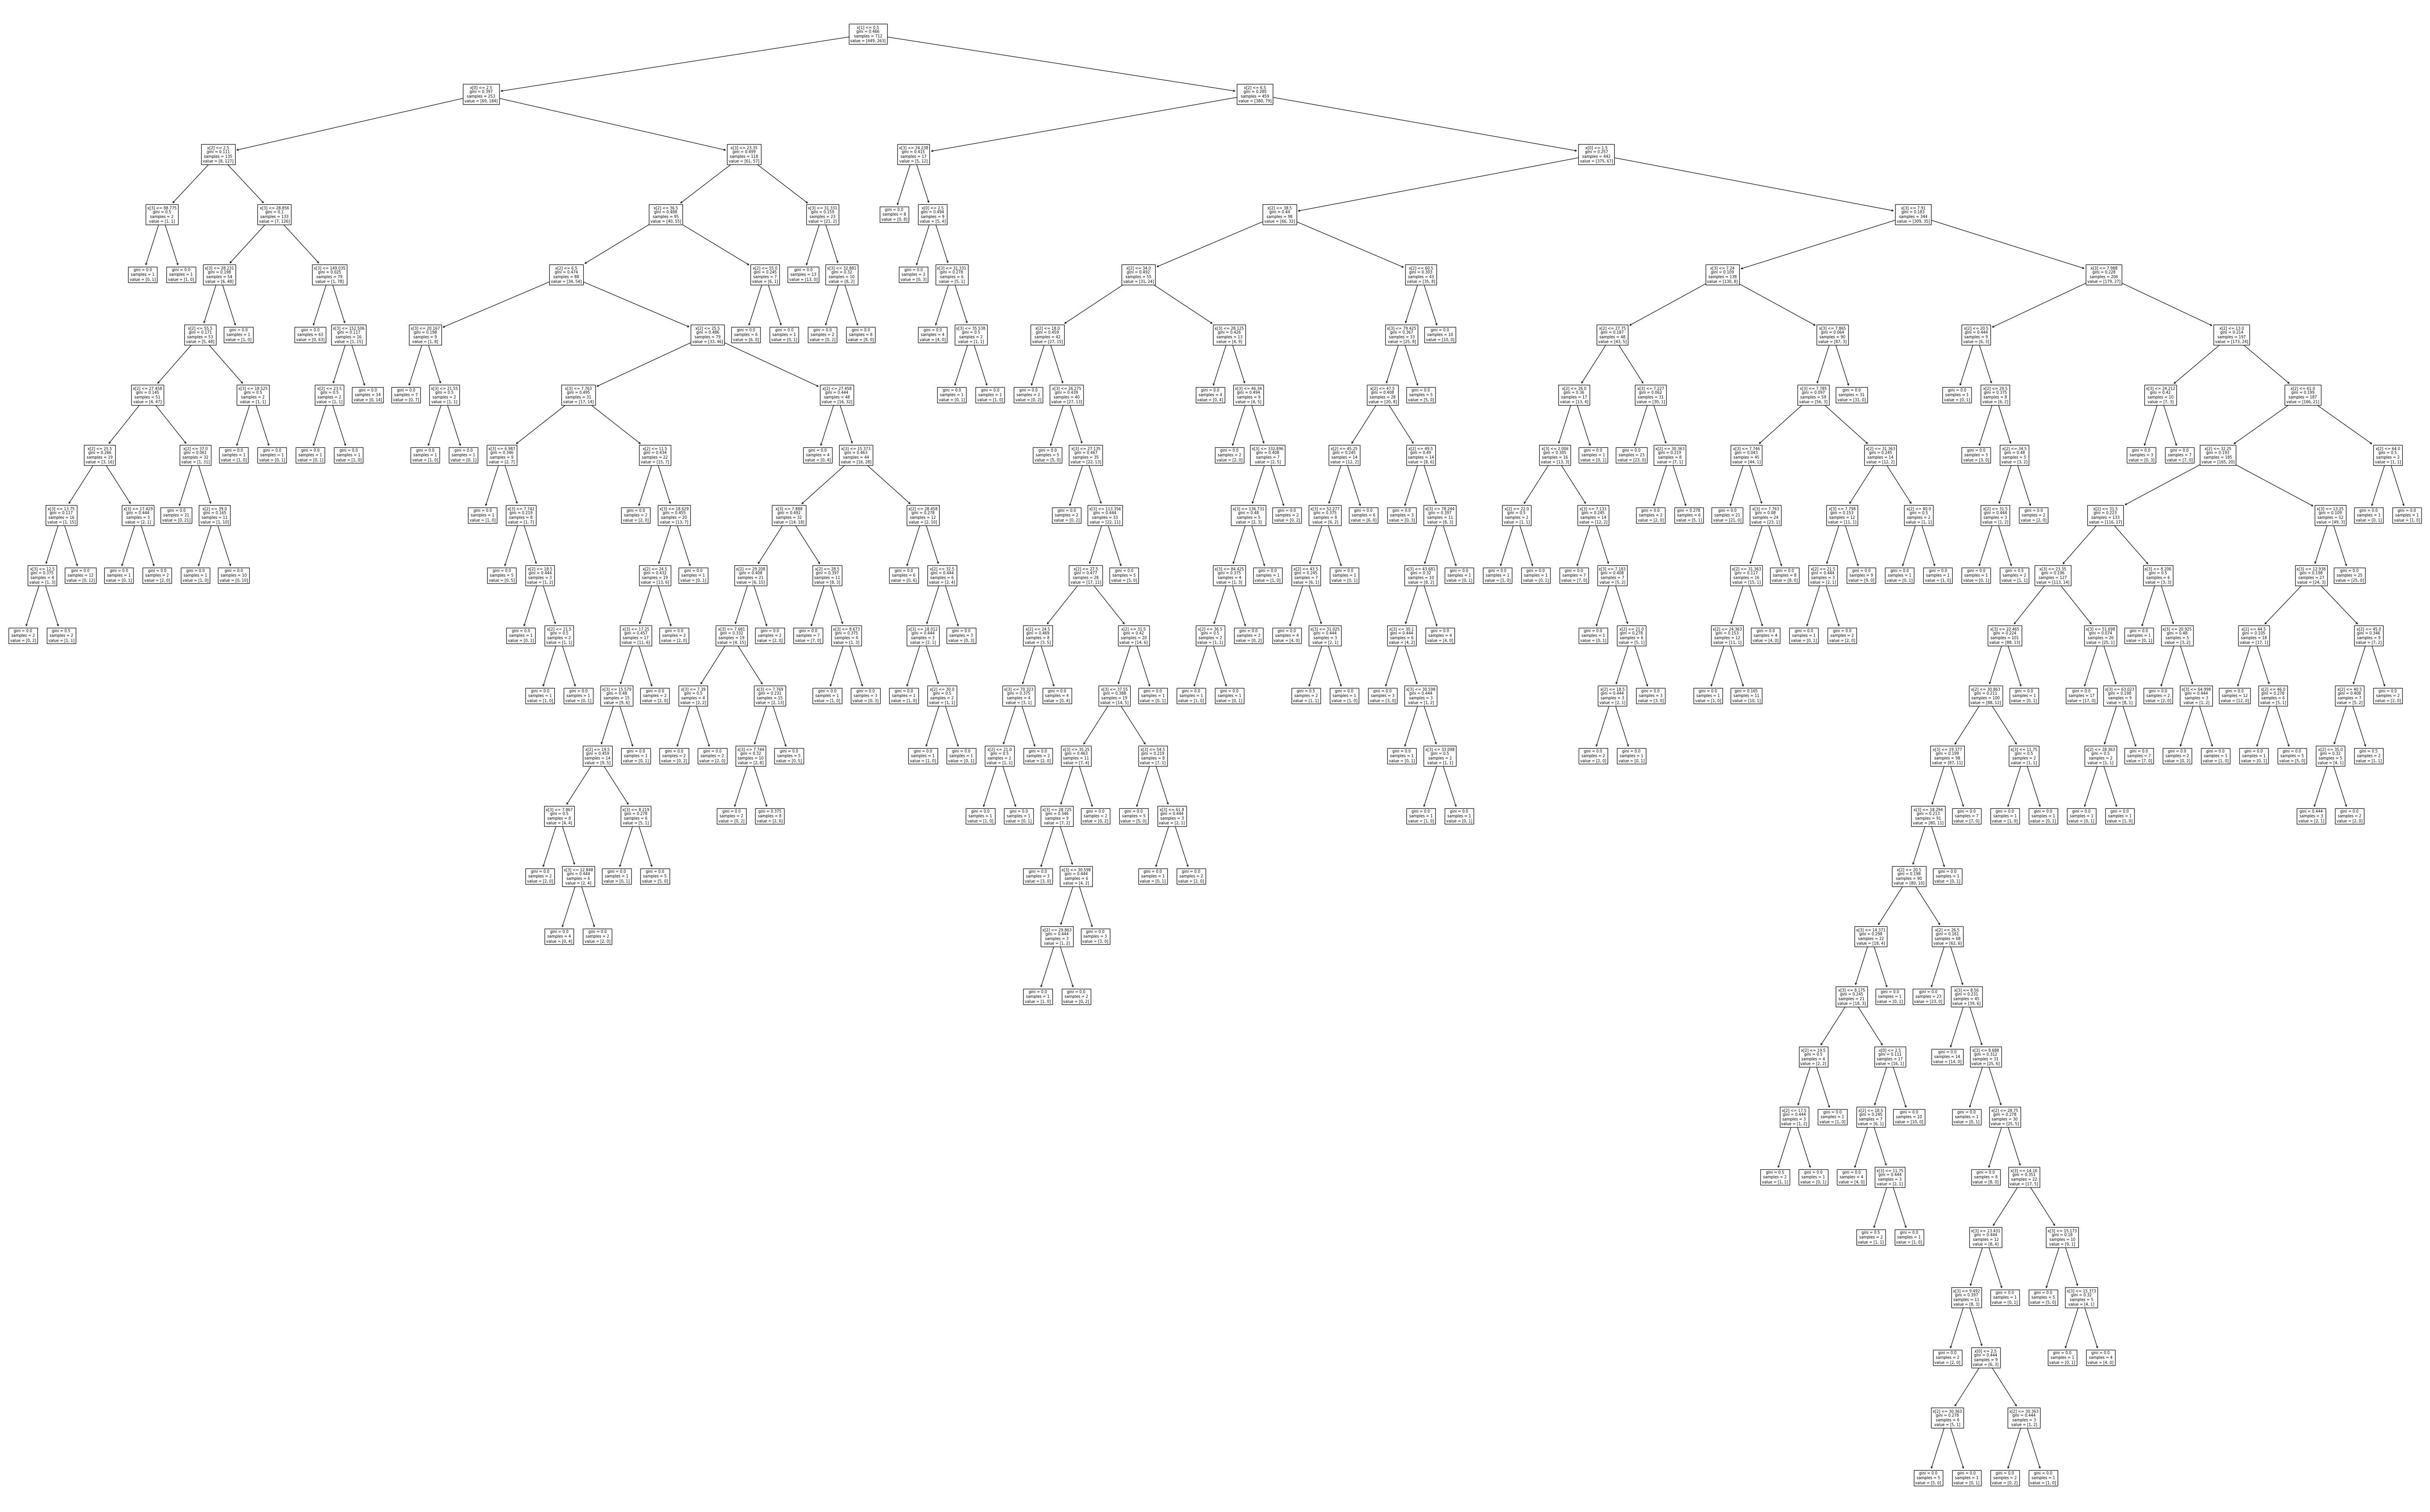

In [29]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=80,50
tree.plot_tree(clf1)

[Text(0.375, 0.9807692307692307, 'x[1] <= 0.5\nentropy = 0.95\nsamples = 712\nvalue = [449, 263]'),
 Text(0.23974763406940064, 0.9423076923076923, 'x[0] <= 2.5\nentropy = 0.845\nsamples = 253\nvalue = [69, 184]'),
 Text(0.167192429022082, 0.9038461538461539, 'x[3] <= 28.856\nentropy = 0.324\nsamples = 135\nvalue = [8, 127]'),
 Text(0.14195583596214512, 0.8653846153846154, 'x[3] <= 28.231\nentropy = 0.497\nsamples = 55\nvalue = [6, 49]'),
 Text(0.12933753943217666, 0.8269230769230769, 'x[2] <= 55.5\nentropy = 0.445\nsamples = 54\nvalue = [5, 49]'),
 Text(0.0946372239747634, 0.7884615384615384, 'x[2] <= 27.458\nentropy = 0.391\nsamples = 52\nvalue = [4, 48]'),
 Text(0.06309148264984227, 0.75, 'x[2] <= 25.5\nentropy = 0.61\nsamples = 20\nvalue = [3, 17]'),
 Text(0.03785488958990536, 0.7115384615384616, 'x[3] <= 13.75\nentropy = 0.323\nsamples = 17\nvalue = [1, 16]'),
 Text(0.025236593059936908, 0.6730769230769231, 'x[3] <= 12.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.0126

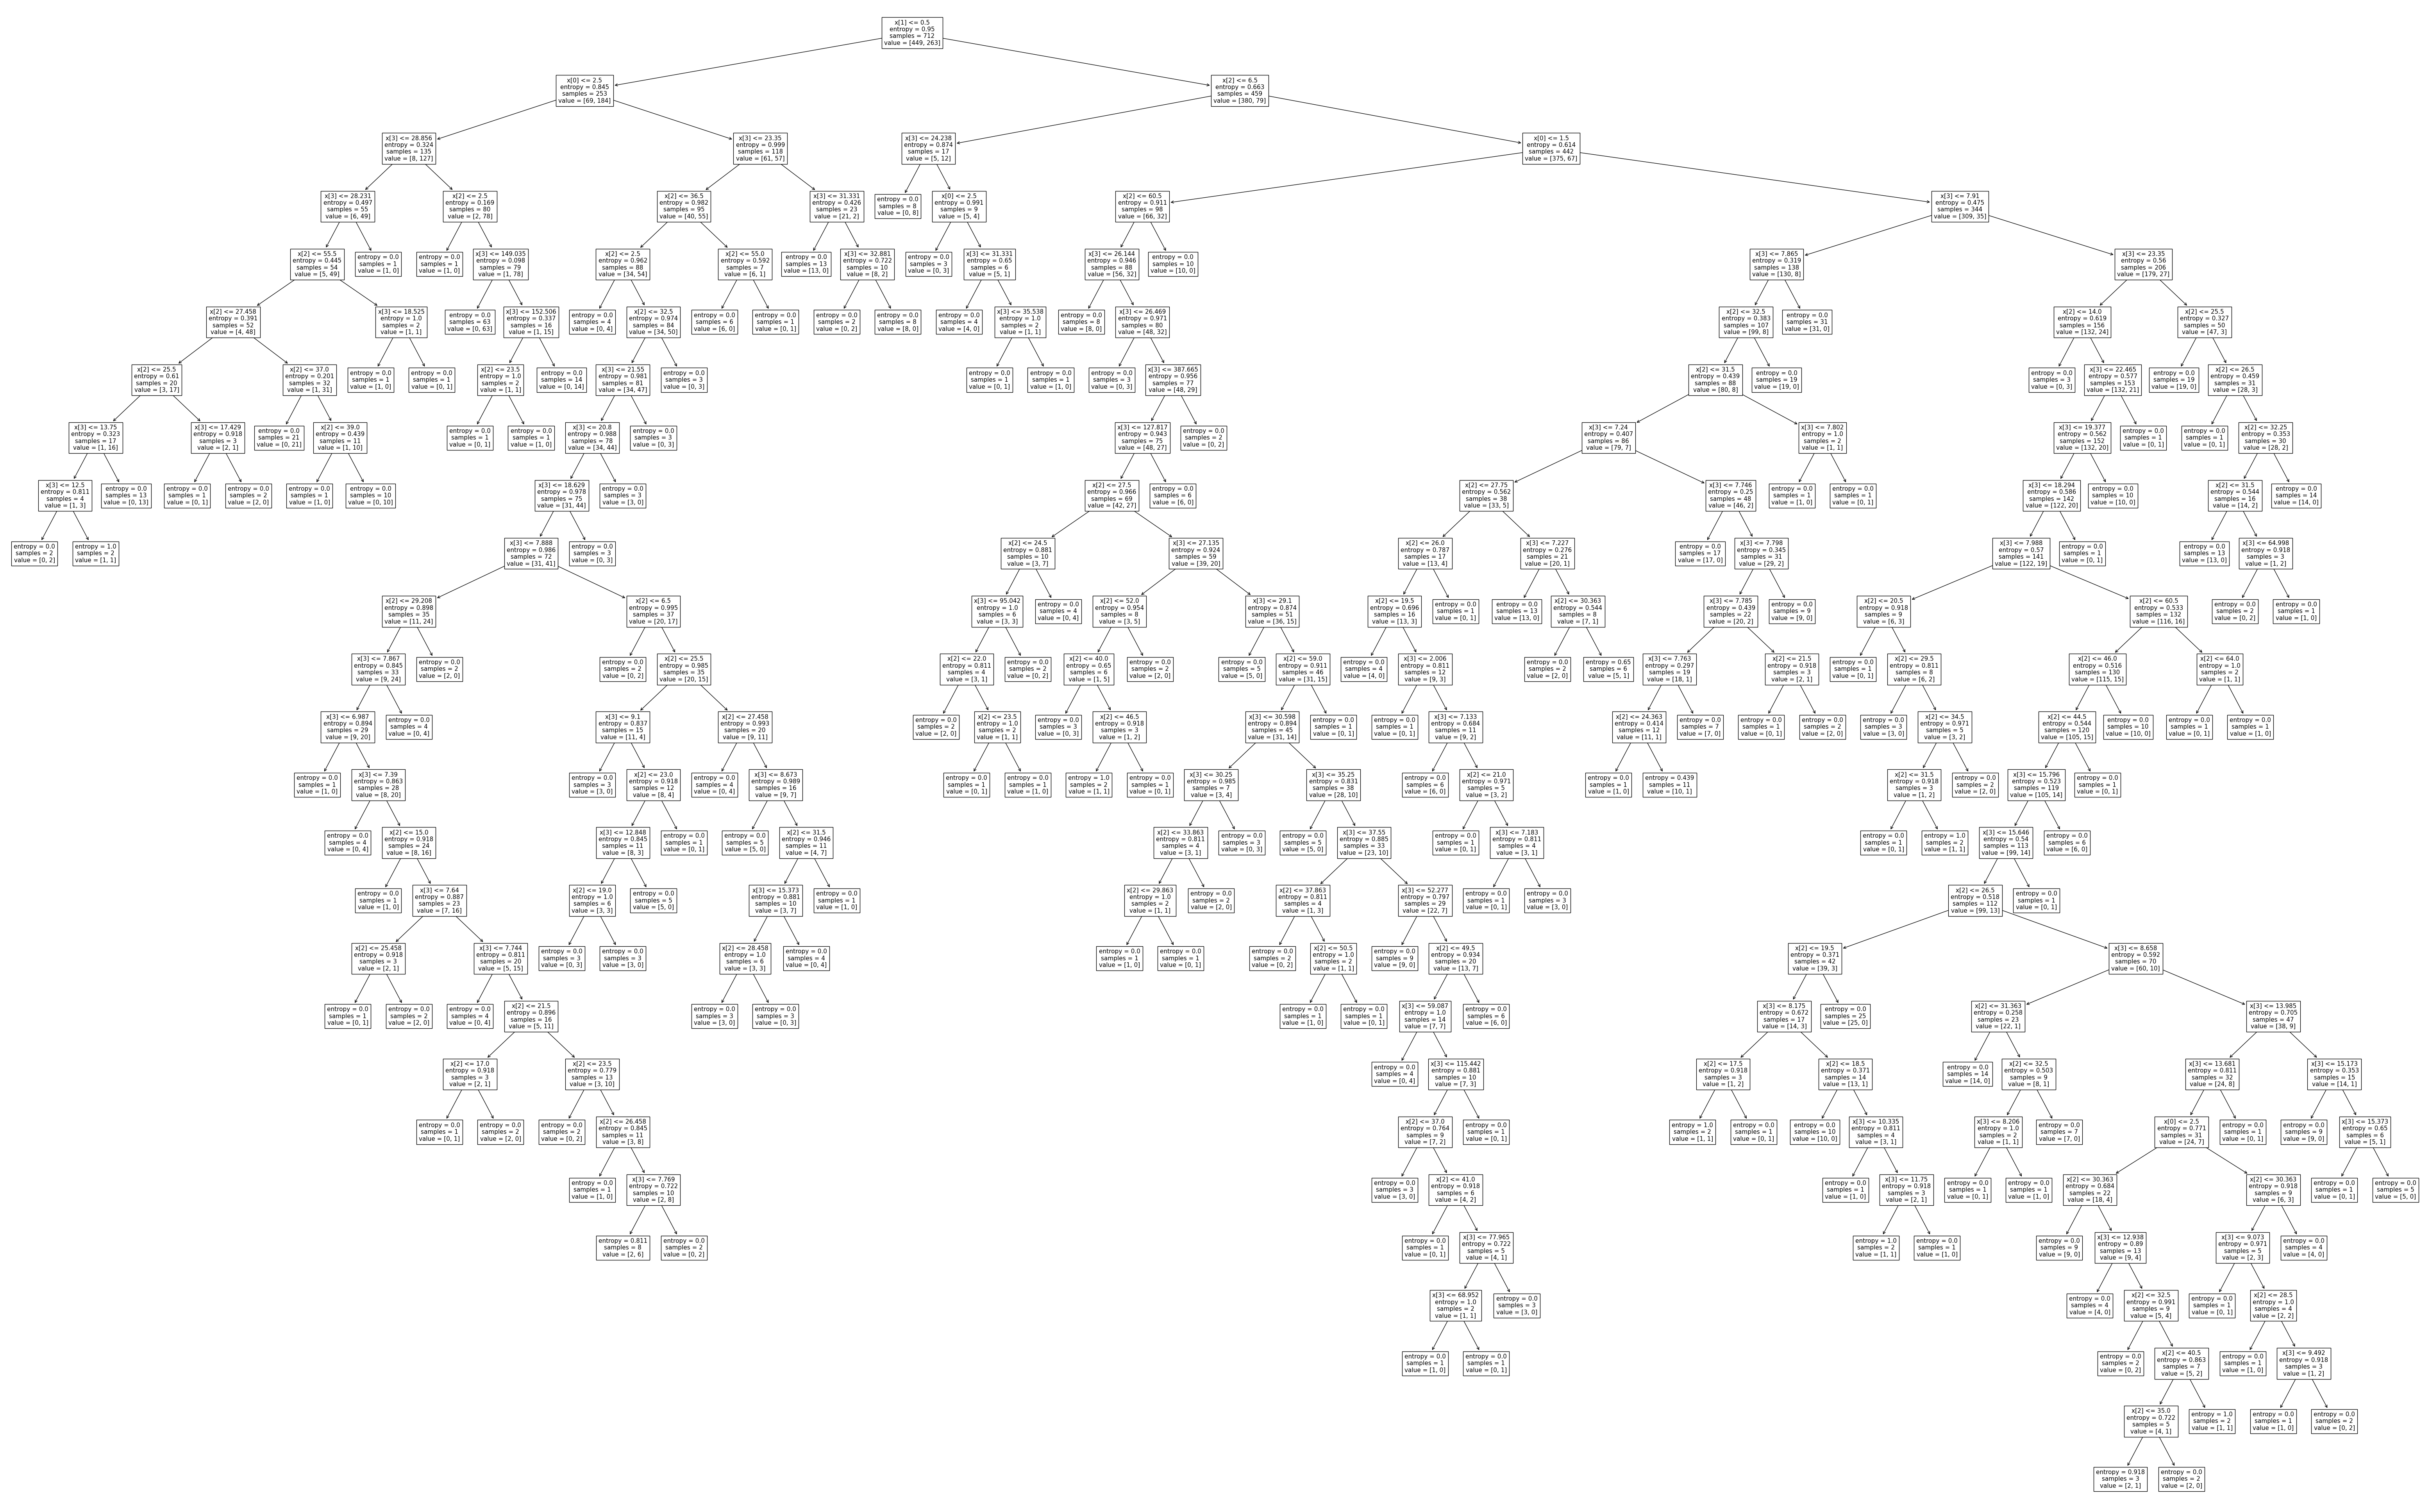

In [30]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=80,50
tree.plot_tree(clf2)

## Evaluating 

In [31]:
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
print(classification_report(Y_test,Y_prediction1))
print(confusion_matrix(Y_test,Y_prediction1))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       100
           1       0.73      0.72      0.73        79

    accuracy                           0.76       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.76      0.76      0.76       179

[[79 21]
 [22 57]]


In [33]:
# Evaluating on training
print(classification_report(Y_train,Y_prediction3))
print(confusion_matrix(Y_train,Y_prediction3))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       449
           1       0.99      0.97      0.98       263

    accuracy                           0.98       712
   macro avg       0.99      0.98      0.98       712
weighted avg       0.98      0.98      0.98       712

[[447   2]
 [  9 254]]


## Pruning of our decision tree

## Post Pruning using max tree depth after visualizing tree

In [49]:
clf=DecisionTreeClassifier(max_depth=6,criterion='gini',random_state=0)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [50]:
Y_prediction=clf.predict(X_test)
accuracy_score(Y_test,Y_prediction)

0.7430167597765364

In [51]:
Y_prediction=clf.predict(X_train)
accuracy_score(Y_train,Y_prediction)

0.8651685393258427

[Text(0.41041666666666665, 0.9285714285714286, 'x[1] <= 0.5\ngini = 0.466\nsamples = 712\nvalue = [449, 263]'),
 Text(0.21458333333333332, 0.7857142857142857, 'x[0] <= 2.5\ngini = 0.397\nsamples = 253\nvalue = [69, 184]'),
 Text(0.075, 0.6428571428571429, 'x[2] <= 2.5\ngini = 0.111\nsamples = 135\nvalue = [8, 127]'),
 Text(0.03333333333333333, 0.5, 'x[3] <= 88.775\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.016666666666666666, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.05, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.11666666666666667, 0.5, 'x[3] <= 28.856\ngini = 0.1\nsamples = 133\nvalue = [7, 126]'),
 Text(0.08333333333333333, 0.35714285714285715, 'x[3] <= 28.231\ngini = 0.198\nsamples = 54\nvalue = [6, 48]'),
 Text(0.06666666666666667, 0.21428571428571427, 'x[2] <= 55.5\ngini = 0.171\nsamples = 53\nvalue = [5, 48]'),
 Text(0.05, 0.07142857142857142, 'gini = 0.145\nsamples = 51\nvalue = [4, 47]'),
 Text(0.083333333333

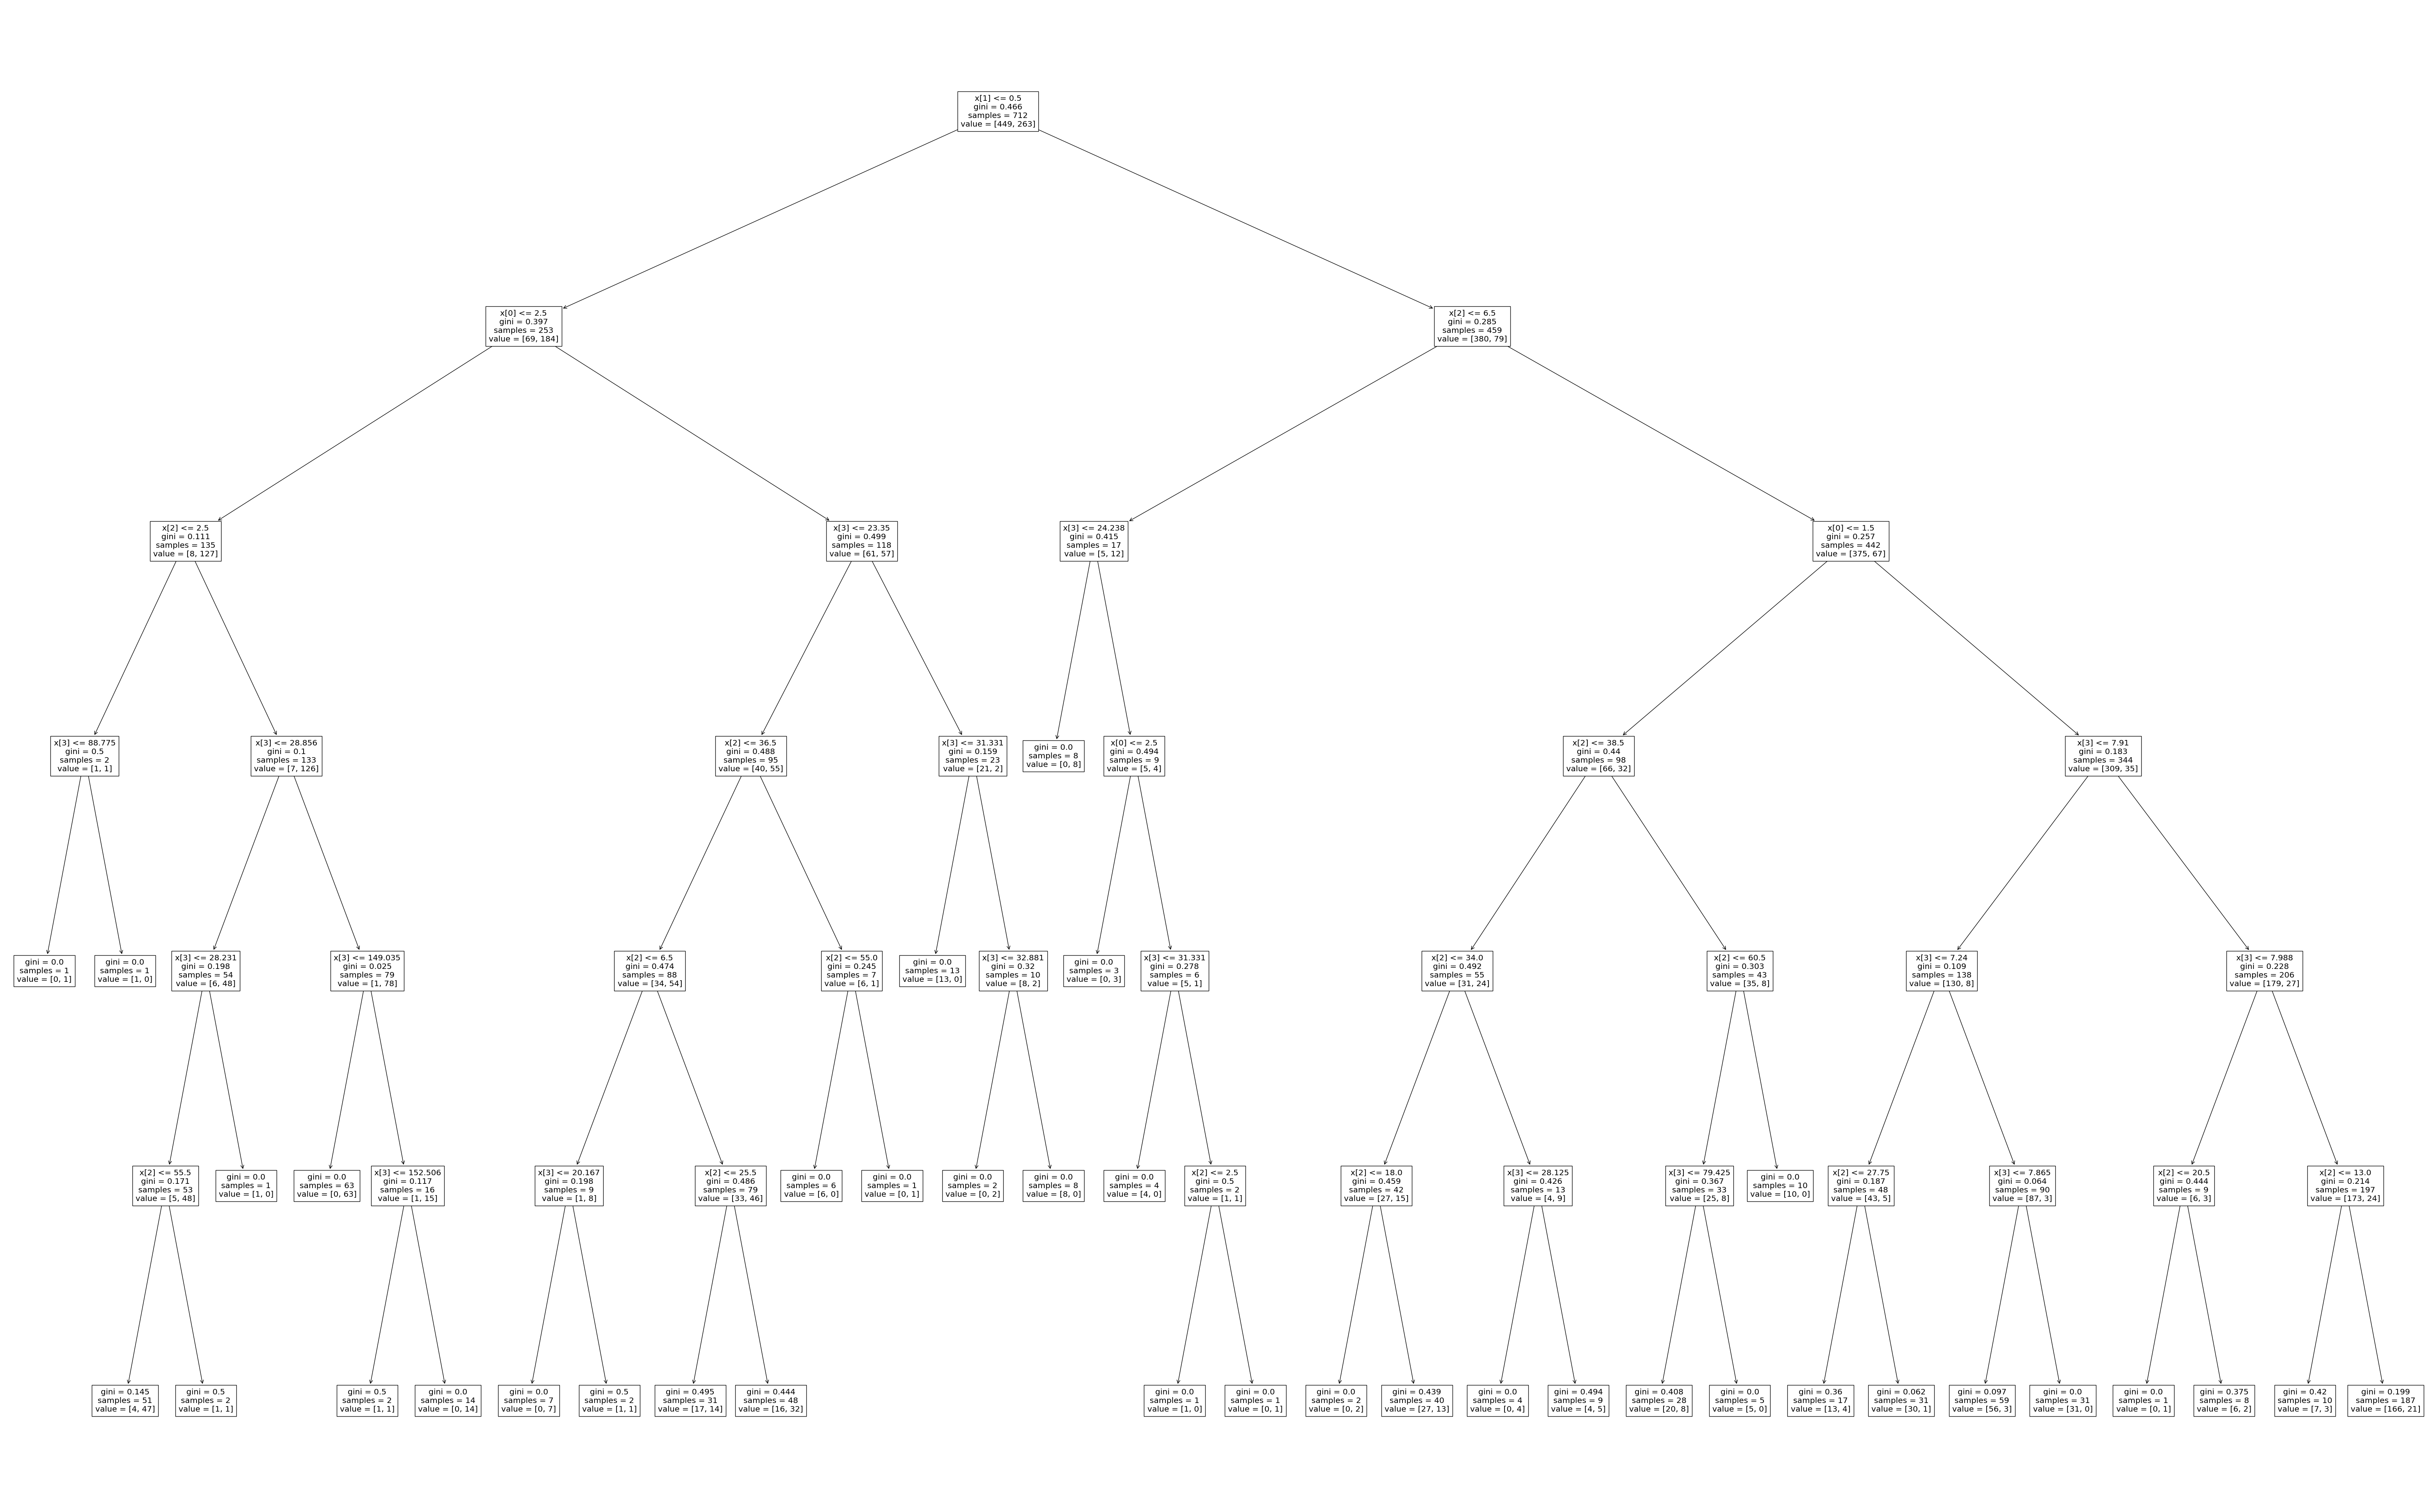

In [52]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=80,50
tree.plot_tree(clf)

## Pre Proning using Grid SearchCV

In [53]:
parameter={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,6],
    'max_features':['auto','sqrt','log2']
}

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
clf=DecisionTreeClassifier()

In [56]:
cv=GridSearchCV(clf,param_grid=parameter,cv=5,scoring='accuracy')

In [57]:
cv.fit(X_train,Y_train)

C:\Users\gyanb\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gyanb\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gyanb\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\gyanb\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 638, in _validate_params
    vali

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [58]:
cv.best_params_

{'criterion': 'log_loss',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [61]:
Y_predict=cv.predict(X_test)

In [62]:
accuracy_score(Y_test,Y_predict)

0.7653631284916201

In [63]:
Y_predict=cv.predict(X_train)
accuracy_score(Y_train,Y_predict)

0.8398876404494382

In [67]:
clf=DecisionTreeClassifier(criterion='log_loss',max_depth=5,max_features='log2',splitter='best')
clf.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=5, max_features='log2')

In [68]:
Y_prediction=clf.predict(X_test)
accuracy_score(Y_test,Y_prediction)

0.770949720670391

In [69]:
Y_prediction=clf.predict(X_train)
accuracy_score(Y_train,Y_prediction)

0.8356741573033708

[Text(0.5833333333333334, 0.9166666666666666, 'x[1] <= 0.5\nlog_loss = 0.95\nsamples = 712\nvalue = [449, 263]'),
 Text(0.3939393939393939, 0.75, 'x[3] <= 48.2\nlog_loss = 0.845\nsamples = 253\nvalue = [69, 184]'),
 Text(0.24242424242424243, 0.5833333333333334, 'x[3] <= 27.825\nlog_loss = 0.939\nsamples = 180\nvalue = [64, 116]'),
 Text(0.12121212121212122, 0.4166666666666667, 'x[0] <= 2.5\nlog_loss = 0.909\nsamples = 154\nvalue = [50, 104]'),
 Text(0.06060606060606061, 0.25, 'x[2] <= 55.5\nlog_loss = 0.445\nsamples = 54\nvalue = [5, 49]'),
 Text(0.030303030303030304, 0.08333333333333333, 'log_loss = 0.391\nsamples = 52\nvalue = [4, 48]'),
 Text(0.09090909090909091, 0.08333333333333333, 'log_loss = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.18181818181818182, 0.25, 'x[2] <= 36.5\nlog_loss = 0.993\nsamples = 100\nvalue = [45, 55]'),
 Text(0.15151515151515152, 0.08333333333333333, 'log_loss = 0.981\nsamples = 93\nvalue = [39, 54]'),
 Text(0.21212121212121213, 0.08333333333333333, 'log_l

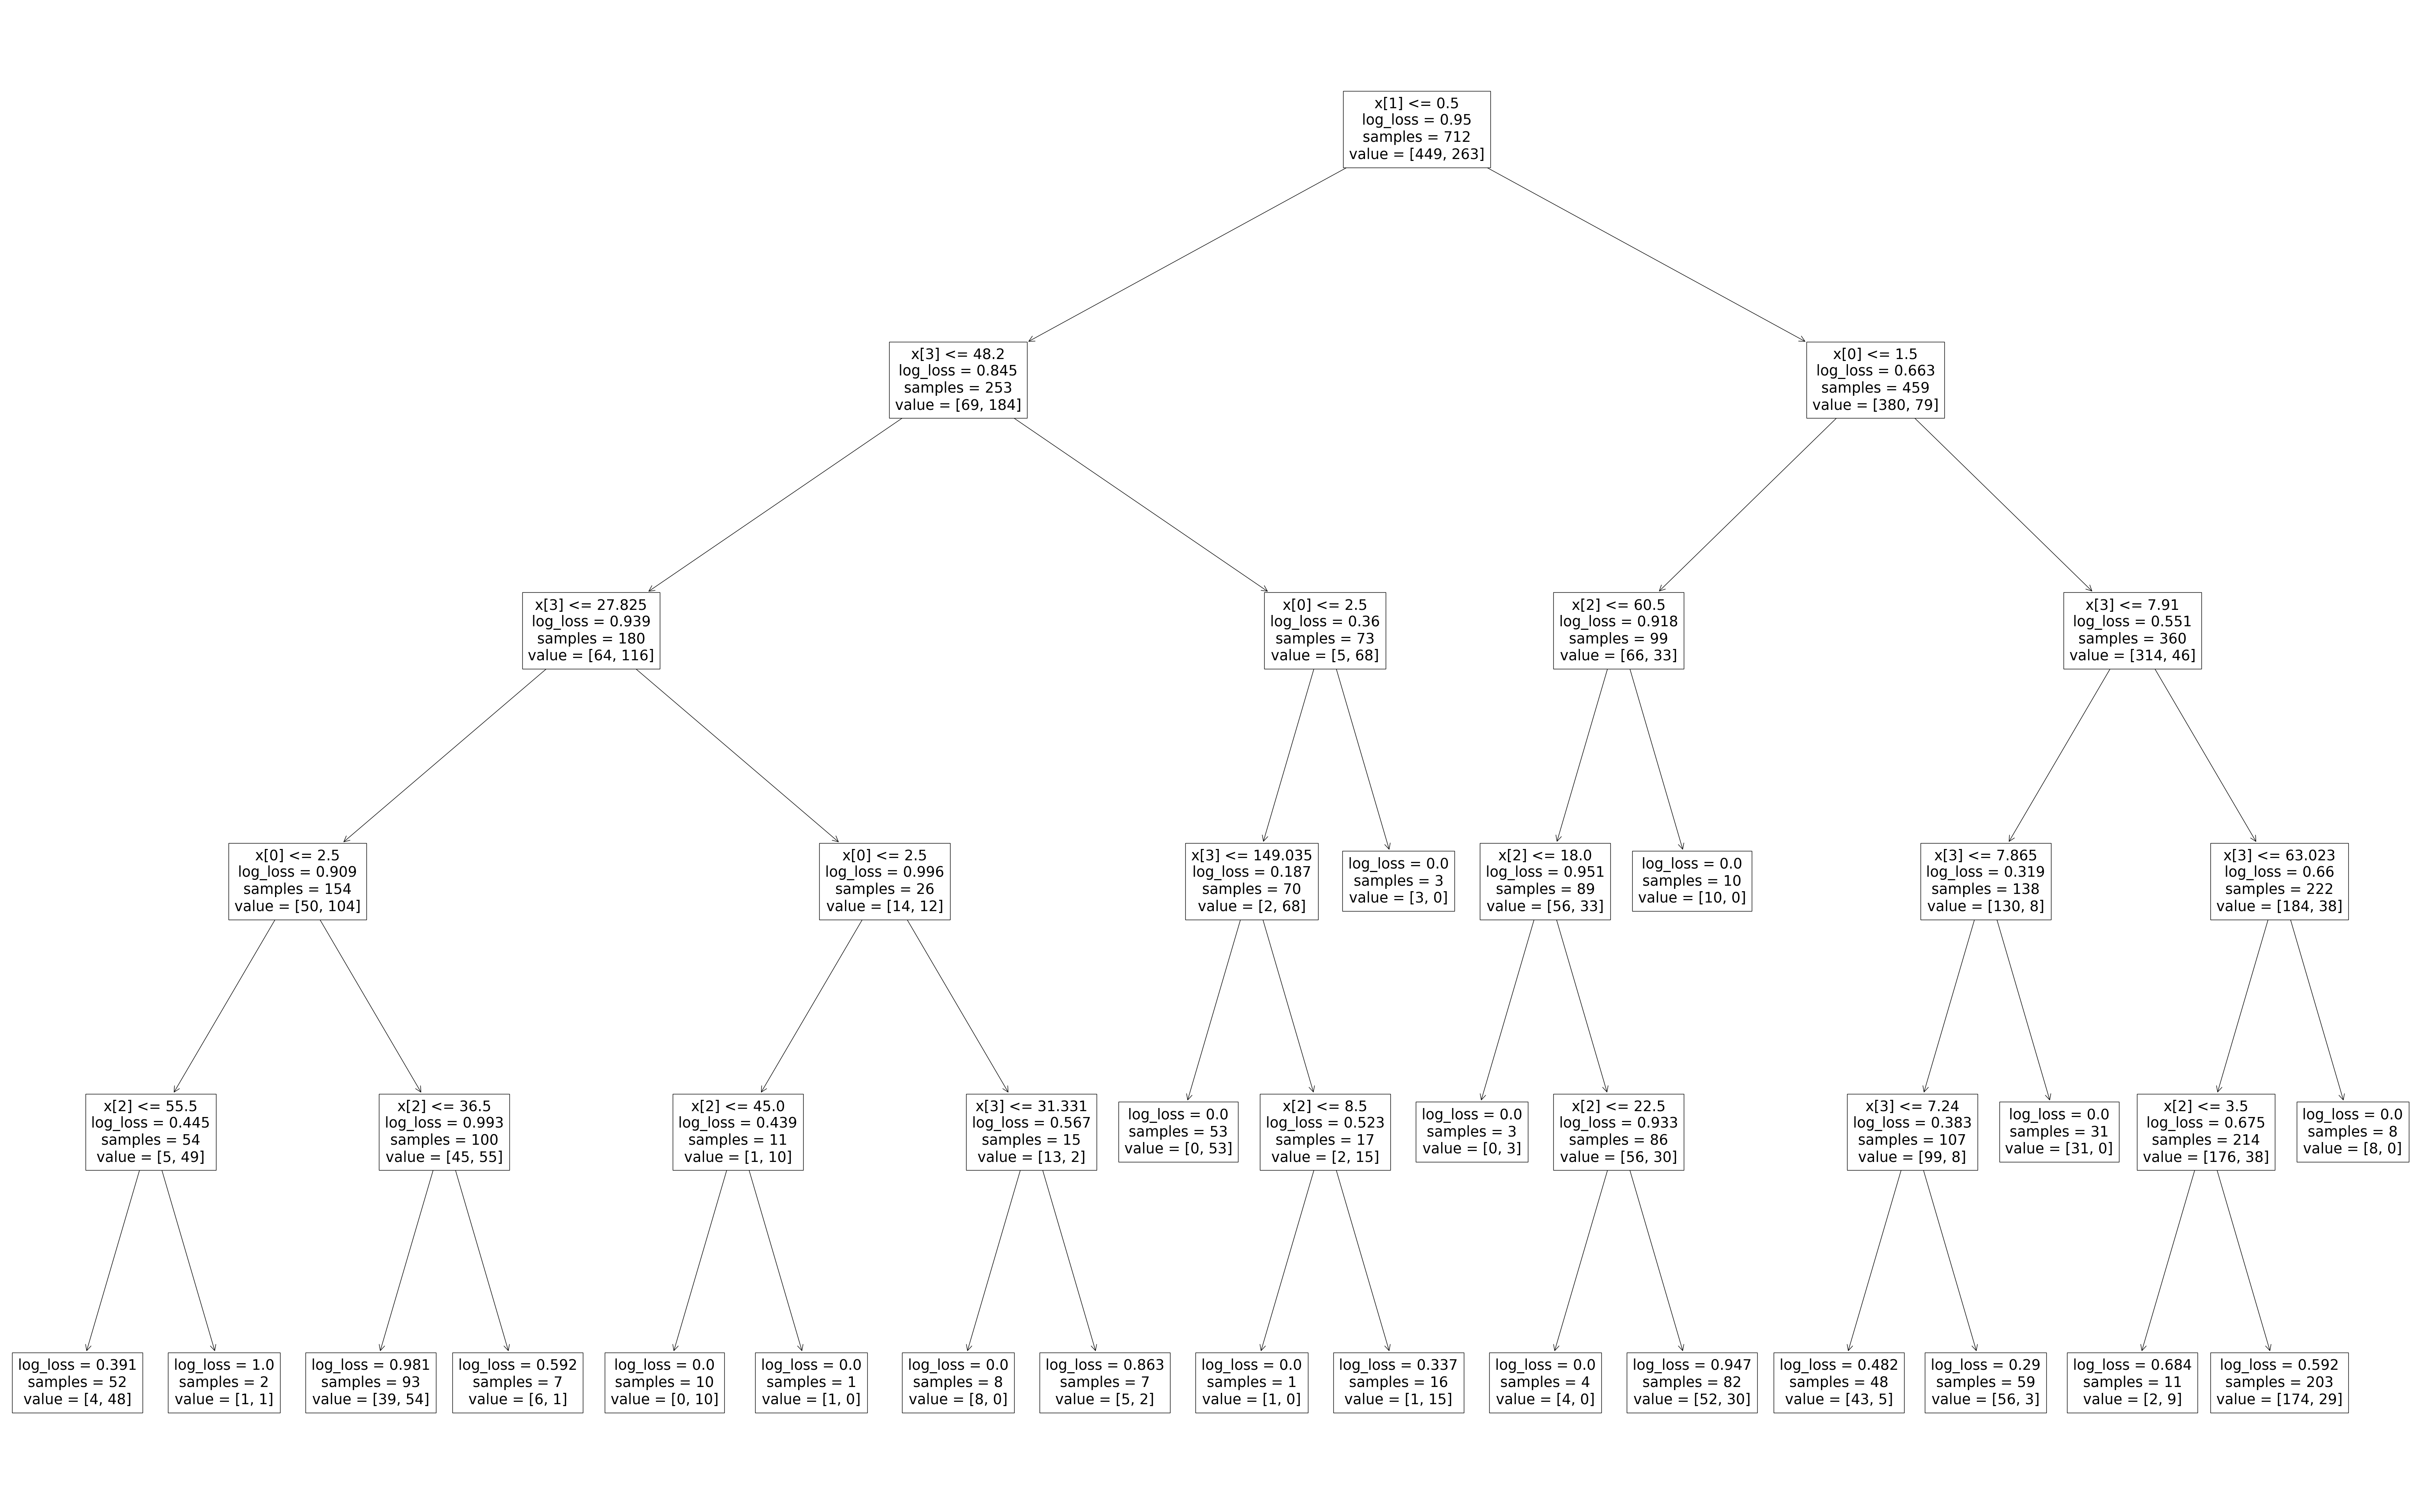

In [70]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=80,50
tree.plot_tree(clf)